In [70]:
import os 
import pandas as pd
import numpy as np

import random as rand
from scipy import signal

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

from sklearn import datasets, decomposition

In [71]:
import chart_studio
import chart_studio.plotly as py

def publish_plotly(fig_bar,filename):

    API_KEY = "add your key "

    chart_studio.tools.set_credentials_file(username='add your user id', api_key='add your key')

    chart_studio.tools.set_config_file(world_readable=True,
        sharing='public')

    py.plot(fig_bar, filename = filename, auto_open=True)

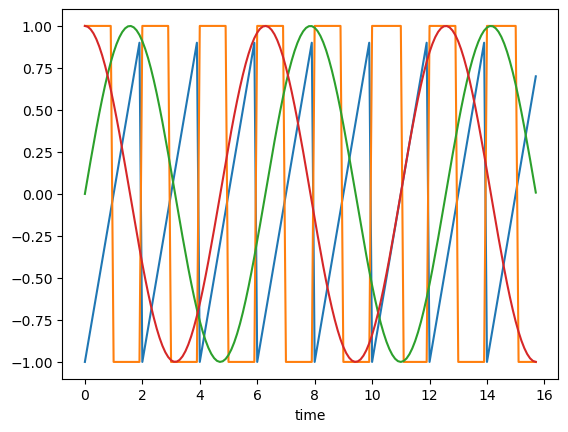

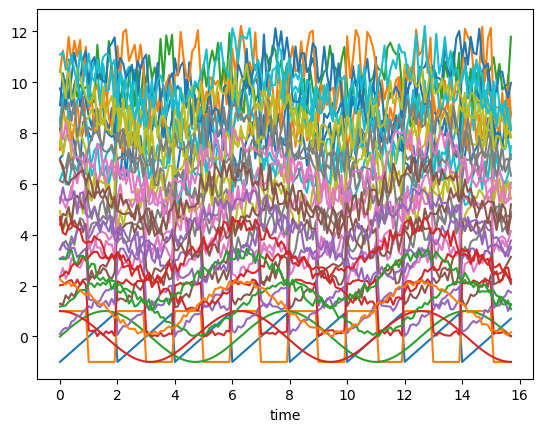

In [72]:
x = np.arange(0, 5*np.pi, 0.1)
y_square = signal.square( np.pi *  x)
y_sawtooth = signal.sawtooth(np.pi * x)
y_sin=np.sin(x)
y_cos=np.cos(x)


df_waves = pd.DataFrame([x,y_sawtooth,y_square,y_sin,y_cos]).transpose()

df_waves = df_waves.rename(columns={0:'time',
                                    1:'sawtooth',
                                    2:'square',
                                    3:'sin',
                                    4:'cos'})

df_waves.plot(x='time',legend=False)
plt.savefig('time_series_example.png')
plt.show()

for col in df_waves.columns:
    if col != 'time':
        for i in range(1,10):
            df_waves['{}_{}'.format(col,i)] = df_waves[col].apply(lambda x: x + i + rand.random()*.25*i)

df_waves.plot(x='time',legend=False)
plt.savefig('time_series_randomized.png')
plt.show()

In [43]:
columns_list = list(df_waves.columns)

columns_list.remove('time')

from sklearn.metrics.pairwise import euclidean_distances
df_man_dist_euc = pd.DataFrame(euclidean_distances(df_waves[columns_list].transpose()),
             index = columns_list, 
             columns=columns_list)
import plotly.express as px

fig_euc = px.imshow(df_man_dist_euc)

fig_euc.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    showlegend = False,
    width = 1000, height = 1000,
    autosize = False,
                     title='Euclidean Distance Heatmap')

fig_euc.show()

In [16]:
publish_plotly(fig_euc,'euclidian_distance_heatmap')

In [42]:
columns_list = list(df_waves.columns)

columns_list.remove('time')

from sklearn.metrics.pairwise import euclidean_distances
df_man_dist_corr = pd.DataFrame(df_waves[columns_list].corr(),
             index = columns_list, 
             columns=columns_list)
import plotly.express as px

fig_corr = px.imshow(df_man_dist_corr)

fig_corr.update_layout(margin = dict(t=200,r=200,b=200,l=200),
                    showlegend = False,
                    width = 1000, height = 1000,
                    autosize = False ,
                 title='Correlation Heatmap')

fig_corr.show()

In [19]:
publish_plotly(fig_corr,'correlation_heat_map')

For n_clusters = 2 The average silhouette_score is : 0.5623132513232418
For n_clusters = 3 The average silhouette_score is : 0.5341504146296756
For n_clusters = 4 The average silhouette_score is : 0.5208103651713148
For n_clusters = 5 The average silhouette_score is : 0.49963903431927675
For n_clusters = 6 The average silhouette_score is : 0.4937339207307
For n_clusters = 7 The average silhouette_score is : 0.484309104759103
For n_clusters = 8 The average silhouette_score is : 0.5115563301891065


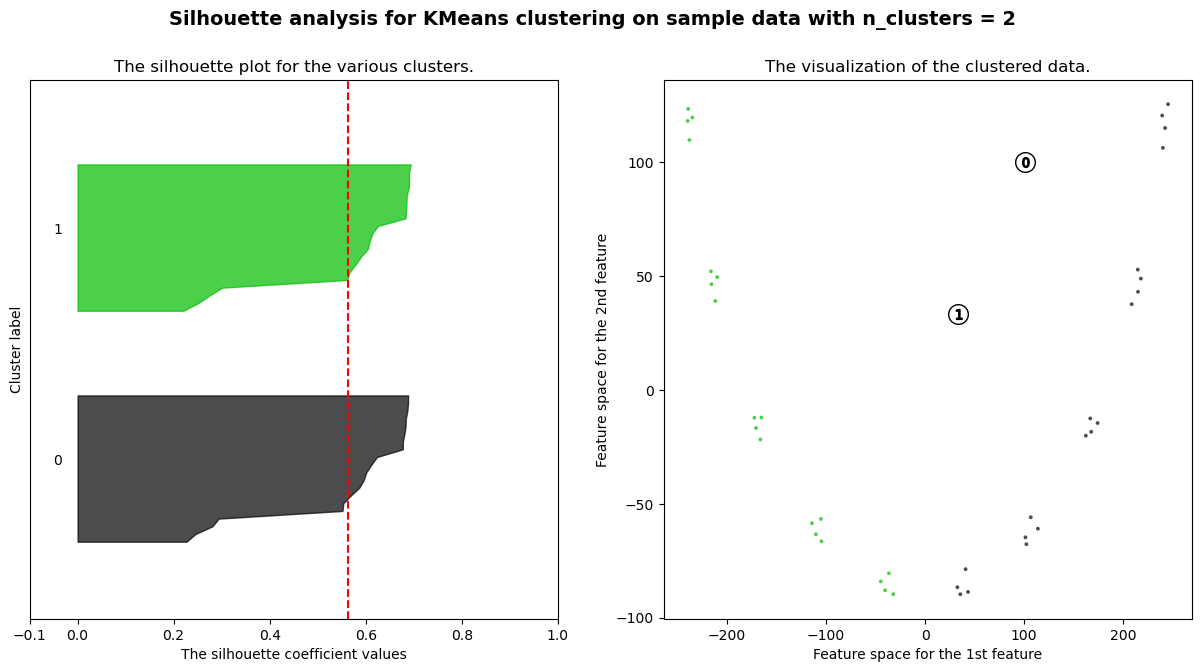

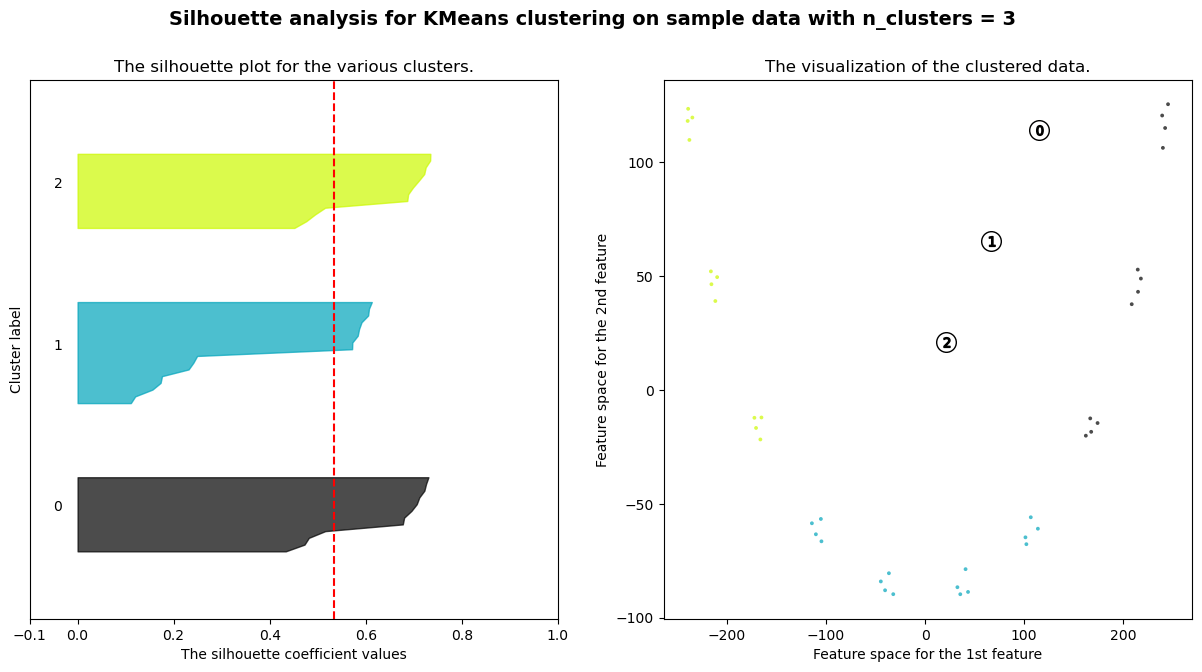

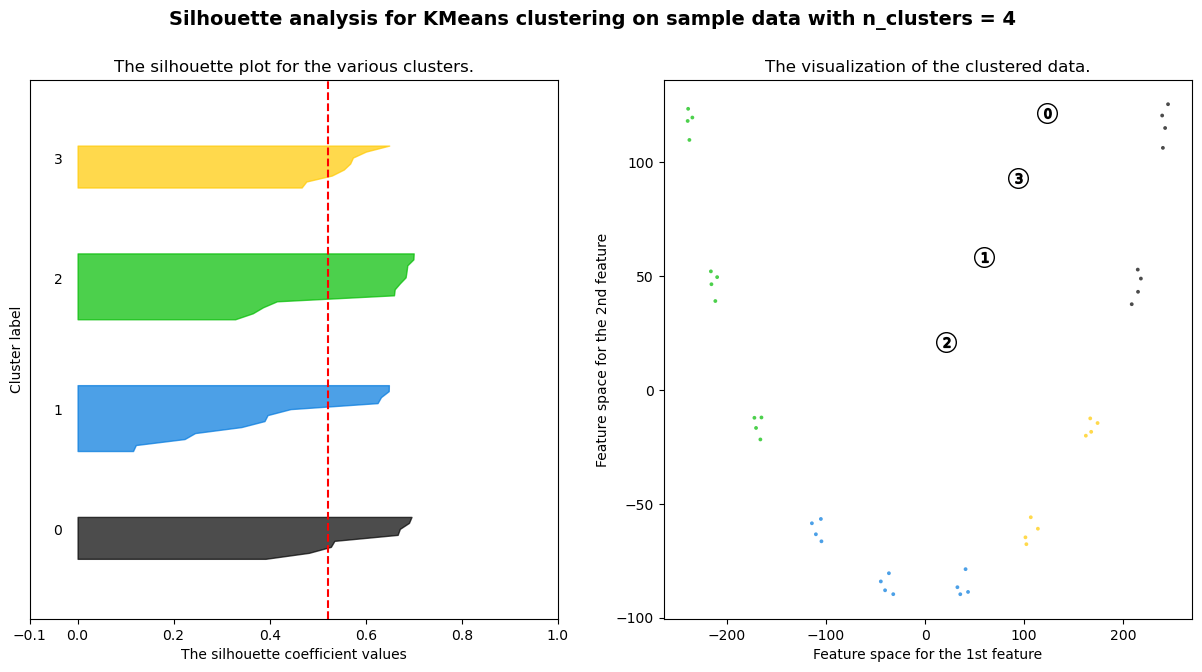

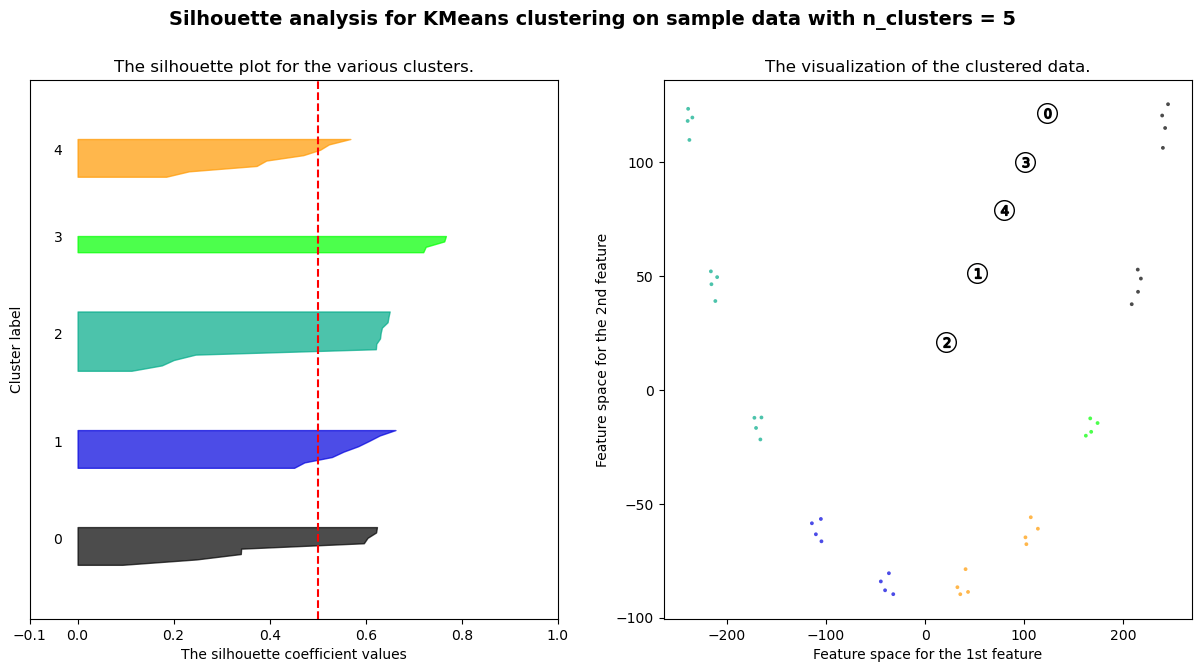

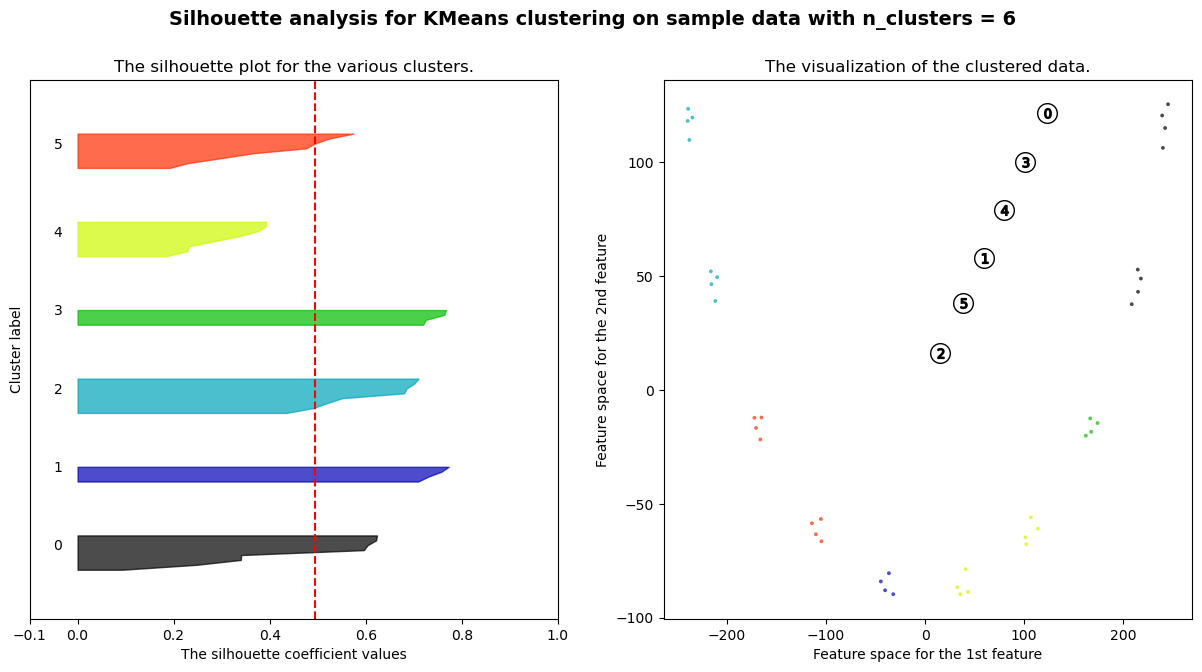

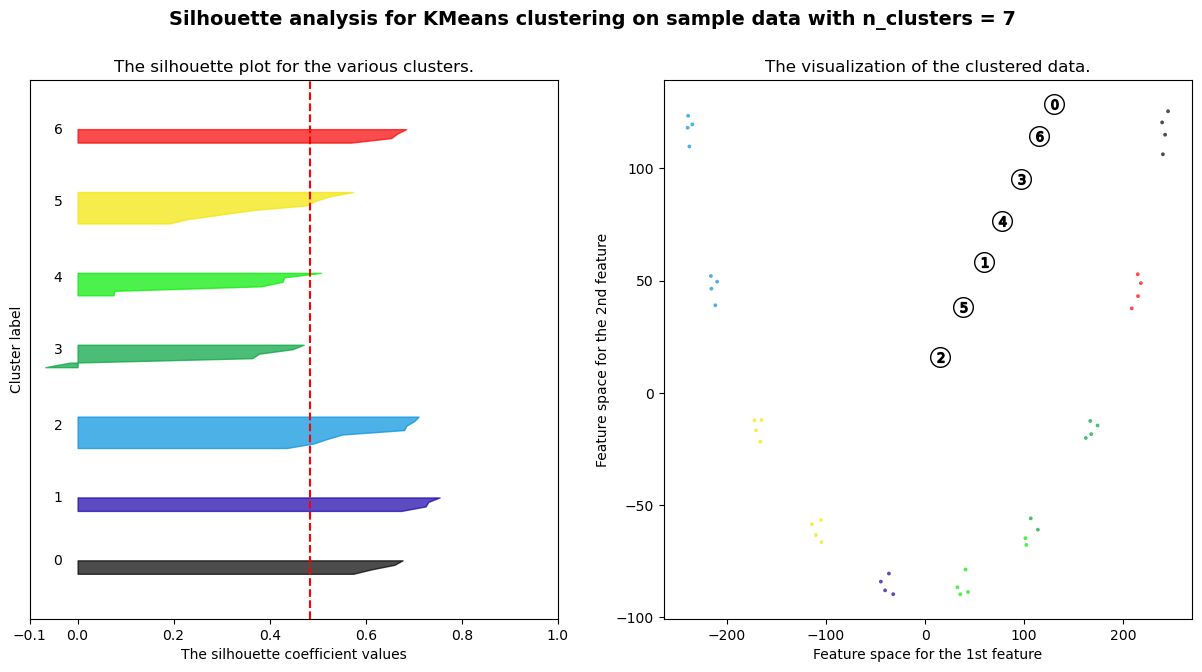

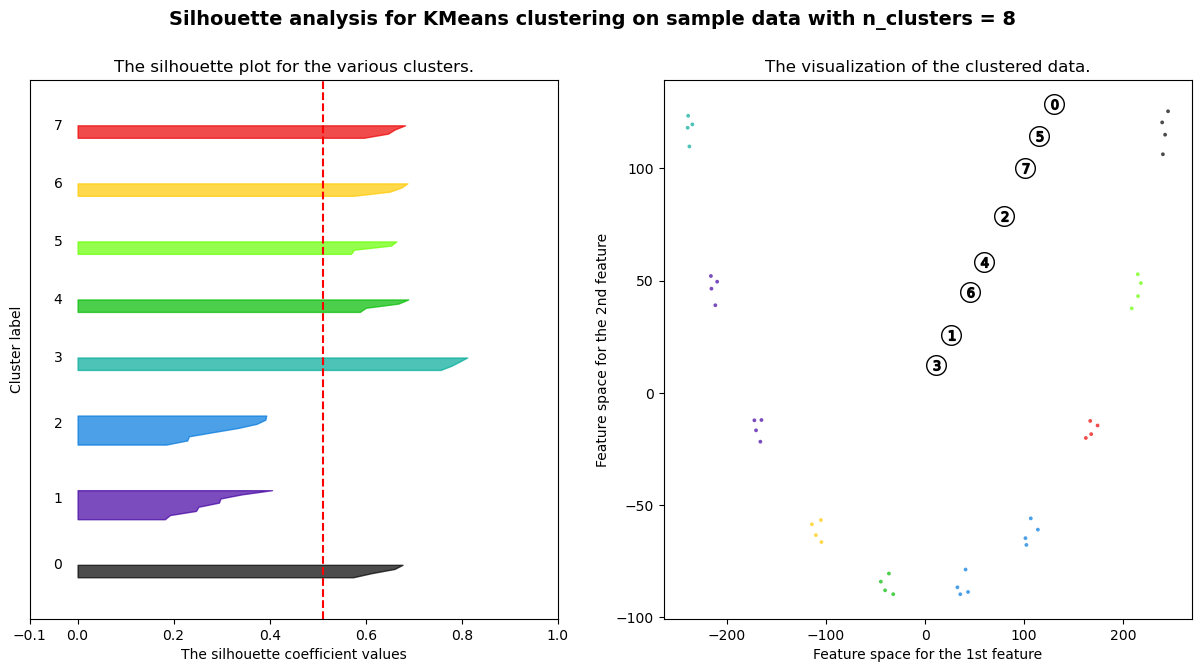

In [89]:
############ reduing components on eucl distance metrics for visualisation #######
pca = decomposition.PCA(n_components=2)
pca.fit(df_man_dist_euc)
df_fc_cleaned_reduced_euc = pd.DataFrame(pca.transform(df_man_dist_euc).transpose(), 
                                              index = ['PC_1','PC_2'],
                                              columns = df_man_dist_euc.transpose().columns)

index = 0
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterate over different cluster numbers
for n_clusters in range_n_clusters:
    # Create a subplot with silhouette plot and cluster visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # Set the x and y axis limits for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_man_dist_euc) + (n_clusters + 1) * 10])

    # Initialize the KMeans clusterer with n_clusters and random seed
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_man_dist_euc)

    # Calculate silhouette score for the current cluster configuration
    silhouette_avg = silhouette_score(df_man_dist_euc, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sil_score_results.loc[index, ['number_of_clusters', 'Euclidean']] = [n_clusters, silhouette_avg]
    index += 1
    
    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(df_man_dist_euc, cluster_labels)
    
    y_lower = 10

    # Plot the silhouette plot
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples in the cluster and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Set the y_upper value for the silhouette plot
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)

        # Fill silhouette plot for the current cluster
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Update y_lower for the next plot

    # Set labels and title for the silhouette plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Add vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Plot the actual clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_fc_cleaned_reduced_euc.transpose().iloc[:, 0], df_fc_cleaned_reduced_euc.transpose().iloc[:, 1],
                marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Label the clusters and cluster centers
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # Set labels and title for the cluster visualization
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Set the super title for the whole plot
    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters,
                 fontsize=14, fontweight="bold")

    plt.savefig('sil_score_eucl_{}.png'.format(index))
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.5220489610010741
For n_clusters = 3 The average silhouette_score is : 0.6654002638237122
For n_clusters = 4 The average silhouette_score is : 0.8574150368531743
For n_clusters = 5 The average silhouette_score is : 0.711090661067115
For n_clusters = 6 The average silhouette_score is : 0.5946535425384043
For n_clusters = 7 The average silhouette_score is : 0.502038479683028
For n_clusters = 8 The average silhouette_score is : 0.4838676983223088


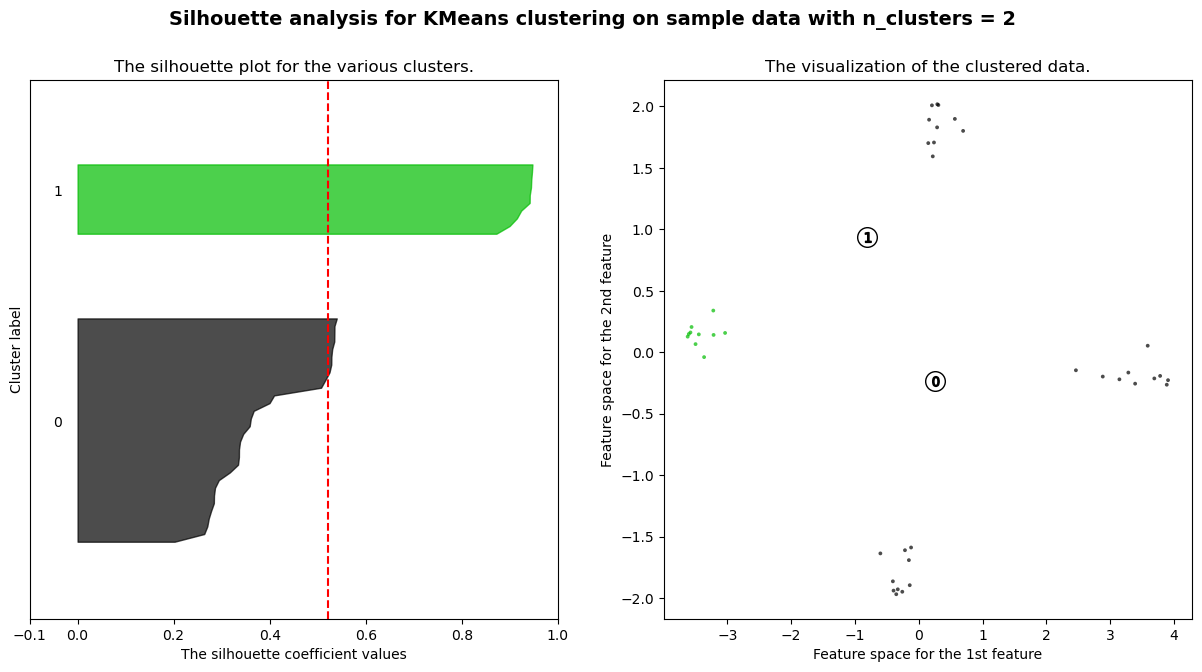

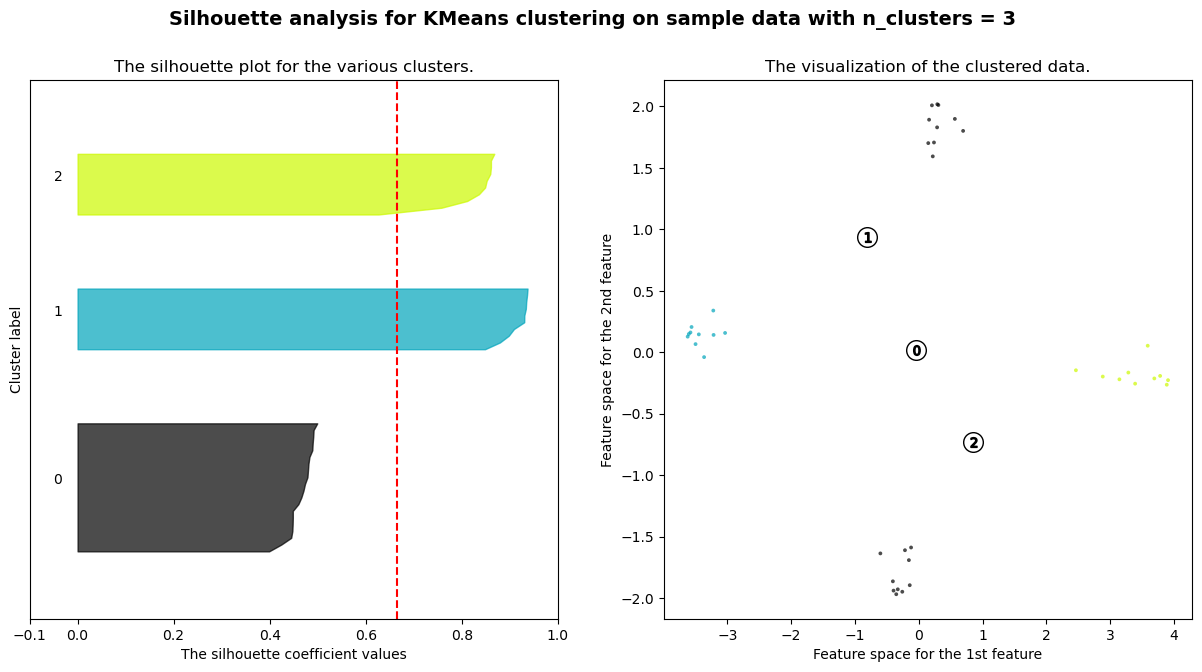

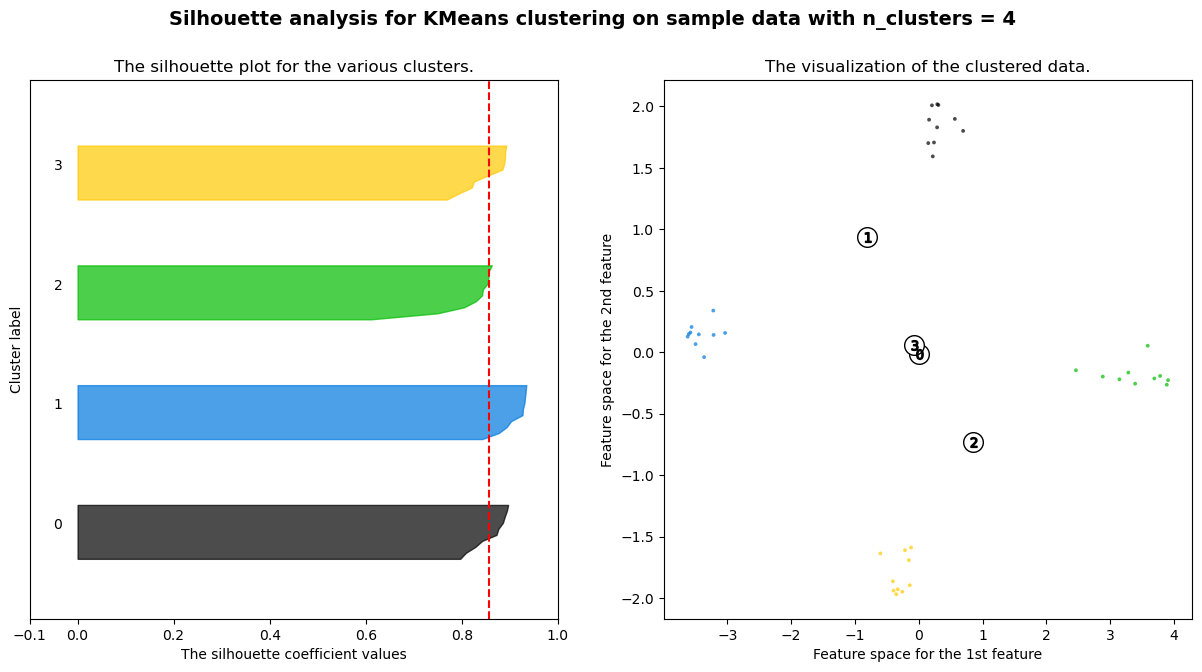

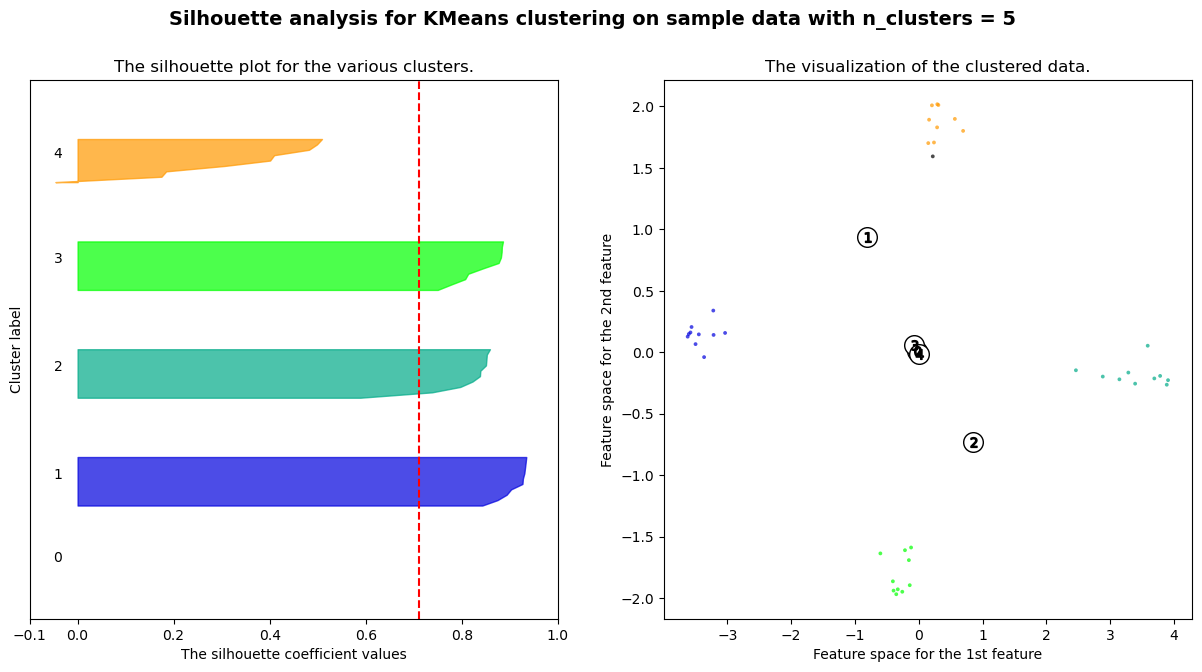

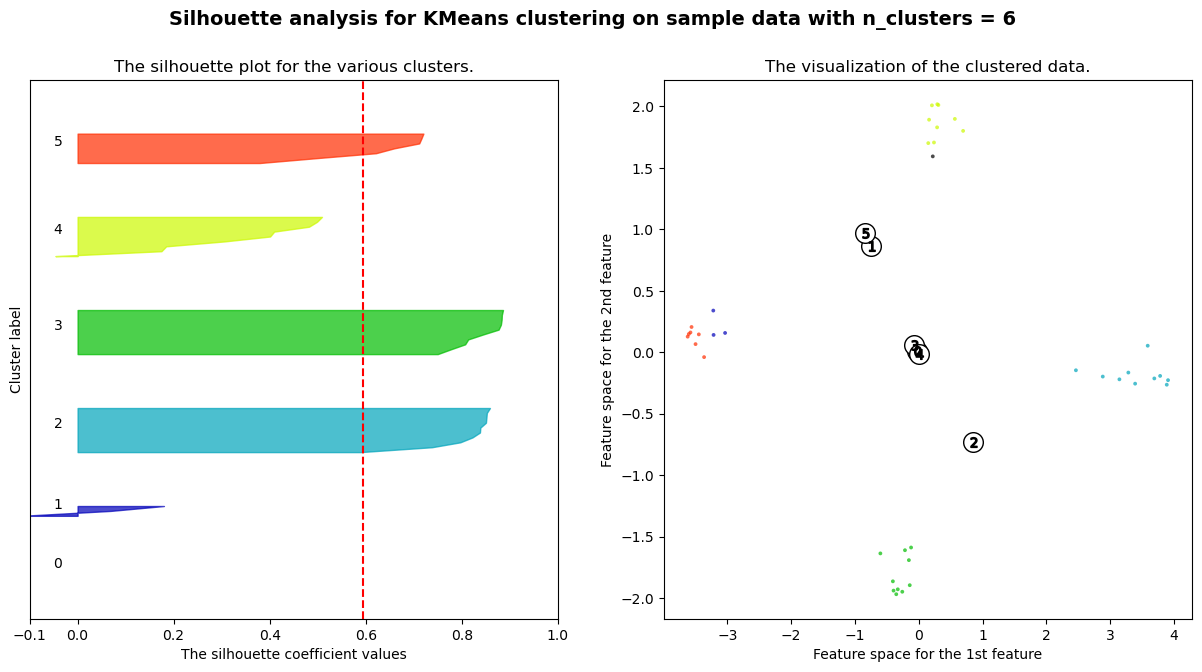

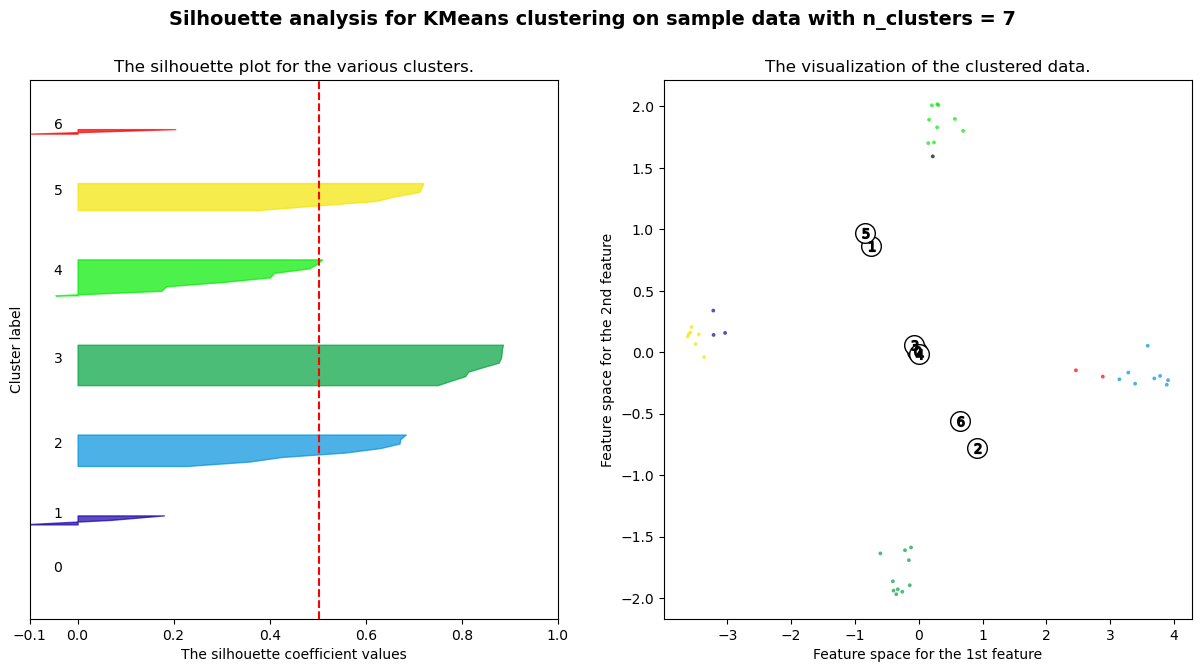

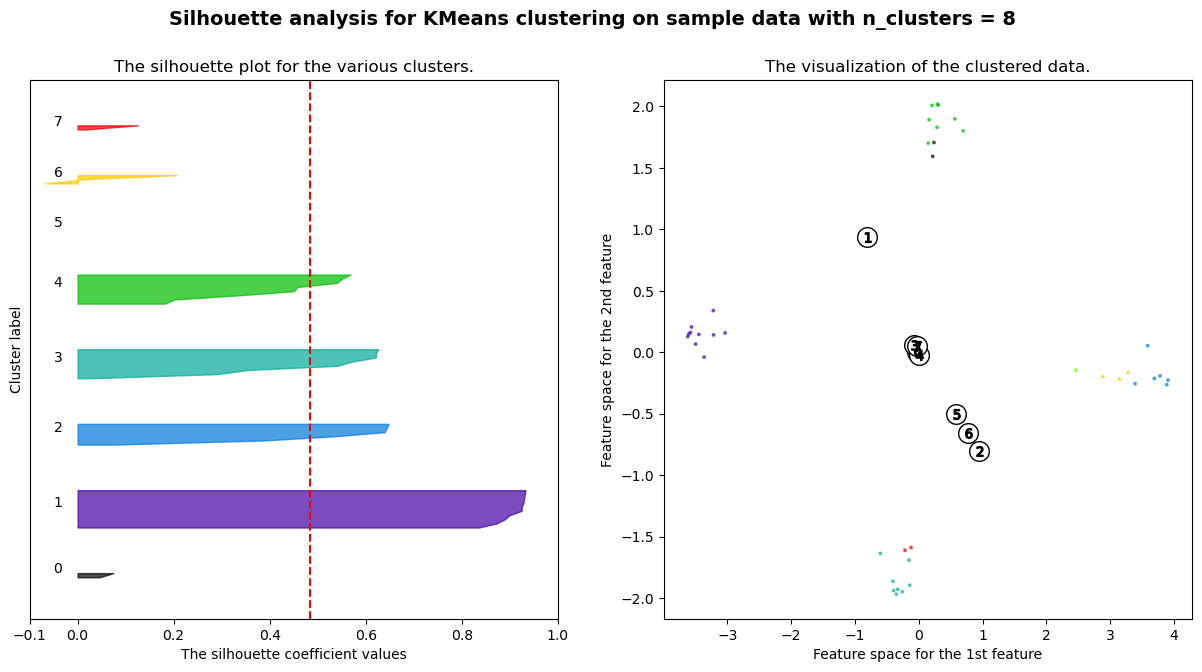

In [91]:
############ reduing components on eucl distance metrics for visualisation #######
pca = decomposition.PCA(n_components=2)
pca.fit(df_man_dist_corr)
df_fc_cleaned_reduced_corr = pd.DataFrame(pca.transform(df_man_dist_corr).transpose(), 
                                              index = ['PC_1','PC_2'],
                                              columns = df_man_dist_corr.transpose().columns)

index=0
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_man_dist_corr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_man_dist_corr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_man_dist_corr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sil_score_results.loc[index,['number_of_clusters','corrlidean']] = [n_clusters,silhouette_avg]
    index=index+1
    
    sample_silhouette_values = silhouette_samples(df_man_dist_corr, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        df_fc_cleaned_reduced_corr.transpose().iloc[:, 0], 
        df_fc_cleaned_reduced_corr.transpose().iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
#     for i in range(len(df_fc_cleaned_cleaned_reduced.transpose().iloc[:, 0])):
#                         ax2.annotate(list(df_fc_cleaned_cleaned_reduced.transpose().index)[i], 
#                                      (df_fc_cleaned_cleaned_reduced.transpose().iloc[:, 0][i], 
#                                       df_fc_cleaned_cleaned_reduced.transpose().iloc[:, 1][i] + 0.2))
        
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.savefig('sil_score_corr_{}.png'.format(index))

plt.show()

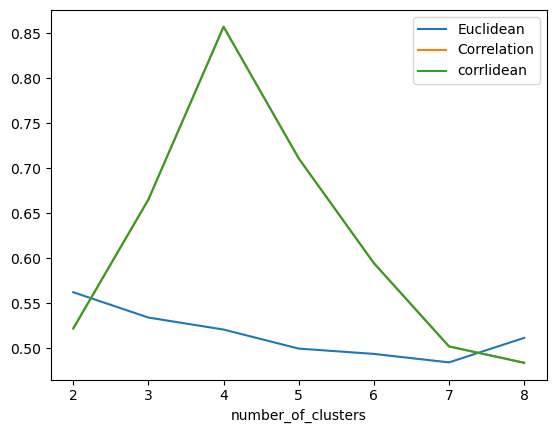

In [92]:
sil_score_results.plot(x='number_of_clusters',kind='line')
plt.savefig('sil_score_results.png')
plt.show()